In [5]:
import torch
import numpy as np

In [6]:
import matplotlib.pyplot as plt
torch.__version__

'2.8.0+cu128'

In [7]:
# superparameter 
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

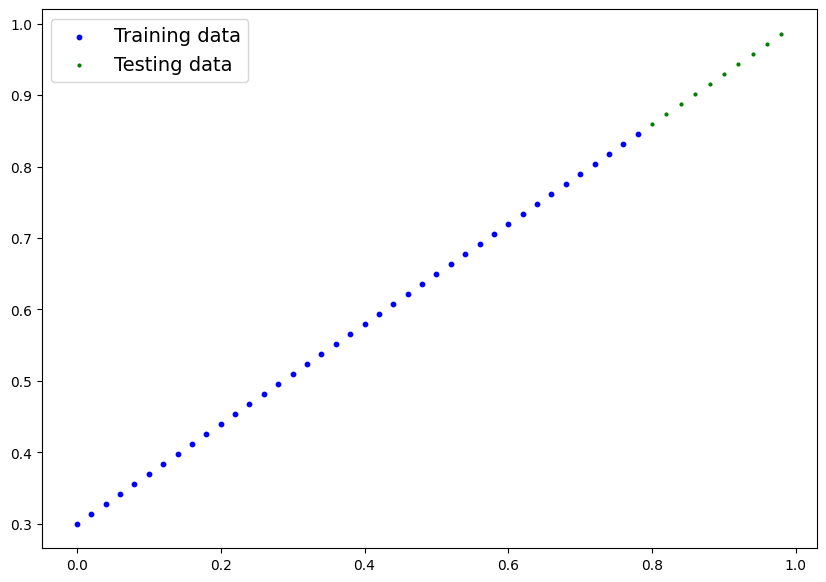

In [20]:
def plot_predictions(train_data=X_train, train_labels=y_train,test_data = X_test, test_labels = y_test, predictions=None):
    """
    plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels,c='b', s=10, label='Training data')
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4,label="Predictions")
    plt.legend(prop={"size":14})

plot_predictions()

In [21]:
# build model
import torch

class LinearRegressionModel(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weight = torch.nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.weight * x + self.bias
    

torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

Number of testing samples: 10
Number of predictions made: 10
predictions values: 
 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


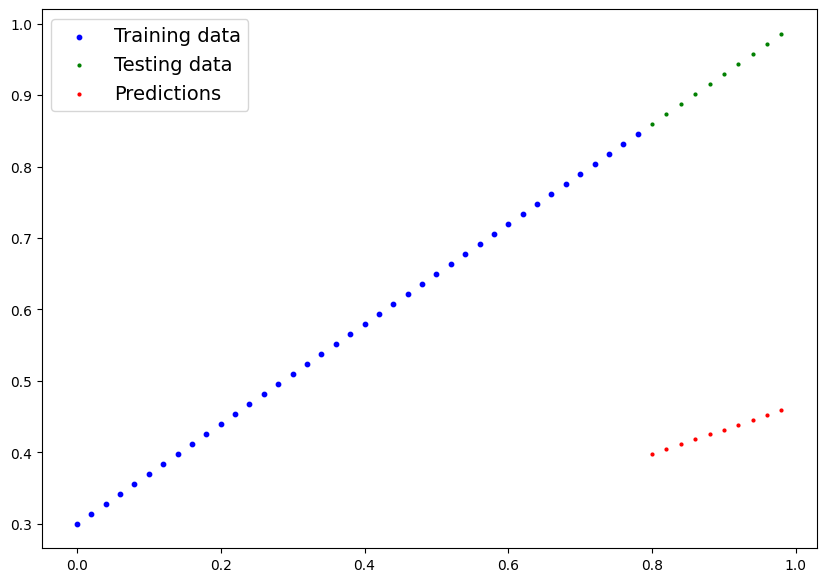

In [24]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
    print(f"Number of testing samples: {len(X_test)}")
    print(f"Number of predictions made: {len(y_preds)}")
    print(f"predictions values: \n {y_preds}")

    plot_predictions(predictions=y_preds)

In [ ]:
# differences
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [27]:
# loss function
loss_fn = torch.nn.L1Loss()
# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

## train loop

torch.manual_seed(42)
epoches = 100
# empty loss lists to track values
train_loss_values = []
test_loss_values=  []
epoch_count = []

for epoch in range(epoches):
    model_0.train()
    # 1, forward on train data 
    y_pred = model_0.forward(X_train)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. zero grad of the optimizer
    optimizer.zero_grad()

    # 4. lodd backwards
    loss.backward()

    # 5. progress the optimizer
    optimizer.step()

    ## test
    model_0.eval()

    with torch.inference_mode():
        # test data
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch}, MAE Train loss: {loss} | MAE Test Loss: {test_loss}")


Epoch: 0, MAE Train loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10, MAE Train loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20, MAE Train loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30, MAE Train loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40, MAE Train loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50, MAE Train loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60, MAE Train loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70, MAE Train loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80, MAE Train loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90, MAE Train loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819


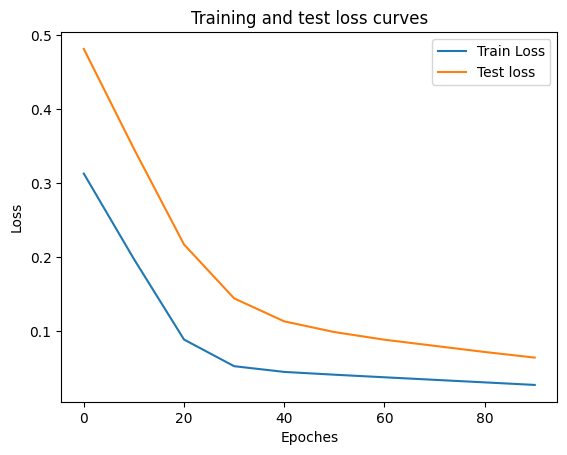

In [28]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoches")
plt.legend()

In [29]:
# output the model's learned parameters
print("The model learned the following values for weights and bias")
print(model_0.state_dict())
print("\n and the original values for the weiights and bias are: ")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias
OrderedDict({'weight': tensor([0.5784]), 'bias': tensor([0.3513])})

 and the original values for the weiights and bias are: 
weights: 0.7, bias: 0.3


In [30]:
# set model in evaluation mode
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

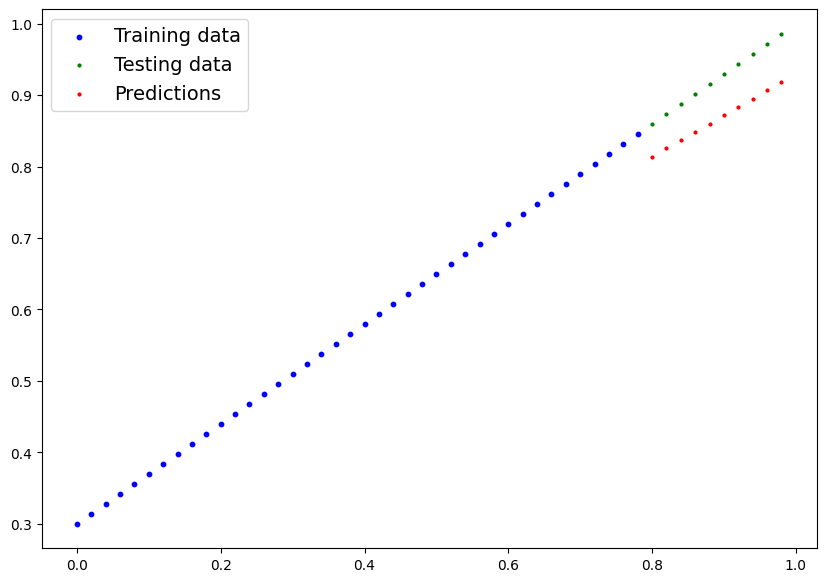

In [31]:
plot_predictions(predictions=y_preds)

## Save Model

In [34]:
from pathlib import Path
MODEL_PATH = Path("models")
print(MODEL_PATH.absolute())
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

/home/scott/repository/tensorflow/juypter/torch/models
Saving model to :models/01_pytorch_workflow_model_0.pth


In [37]:
## load model
load_model_0 = LinearRegressionModel()

load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

load_model_0.eval()
with torch.inference_mode():
    load_model_0_preds = load_model_0(X_test)
y_preds == load_model_0_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [38]:

def device():
    if torch.cuda.is_available():
        return "cuda"
    elif torch.backends.mps.is_available():
        return "mps"
    else:
        return "cpu"